# Equivalent layer technique for estimating total magnetization direction : Iteration process and L-curve application 

Notebook to perform the inversion process. The L-curve 

## Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st

from fatiando.gridder import regular

In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

## Plot style

In [4]:
plt.style.use('ggplot')

## Importing my package

In [5]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [6]:
import auxiliary_functions as fc

## Loading the model

In [7]:
with open('data/model_multi.pickle') as f:
        model_multi = pickle.load(f)

## Loading observation points

In [8]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

## Loading data set

In [9]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

## Open a dictionary

In [10]:
result_RM_airb = dict()

## List of saved files

In [11]:
saved_files = []

## Observation area

In [12]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 5500.0 m 
 x_min = -6500.0 m 
 y_max = 6500.0 m 
 y_min = -5500.0 m


## Airborne survey information

In [13]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (49,25)
Number of data: 1225.0
dx: 250.0 m
dy: 500.0 m 


## Properties of the model

### Main field

In [14]:
inc_gf,dec_gf = model_multi['main_field']

In [15]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -40.0 degree
Main field declination: -22.0 degree


### Magnetization direction

In [16]:
print 'Inclination: %.1f degree' % model_multi['inc_R']
print 'Declination: %.1f degree' % model_multi['dec_R']

Inclination: -25.0 degree
Declination: 30.0 degree


In [17]:
inc_R,dec_R = model_multi['inc_R'],model_multi['dec_R']

## Generating the layer

### Layer depth

In [18]:
h = 1150.

### Generating the equivalent sources coordinates

In [19]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [20]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

## Iteration process : LM-NNLS for positive magnetic-moment distribution

In [21]:
i_pos = 1250

In [22]:
it_max = 30

In [23]:
it_marq = 15

In [24]:
lamb = 10.
dlamb = 100.

In [25]:
eps_e = 1e-4
eps_i = 1e-4

In [26]:
mu_list = [1e2,1e3,1e4,1e5,3.5*1e5,5*1e5,1e6,2*1e6] 

In [27]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.LM_NNLS(
        data['tfa_obs_RM_airb'],airborne['x'],airborne['y'],
        airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_RM_airb'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-15.788166144699405 -7.9085832646468734
0.12042335777668986
i = 1
-19.68642826980623 -5.488192215781127
0.08356214919534939
i = 2
-22.500237483579134 -3.0136911032156073
0.059536681902551944
i = 3
-24.66822742074251 -0.583383529298527
0.045745098312206654
i = 4
-26.409314154514103 1.820950467812466
0.037798449741390586
i = 5
-27.817469755916807 4.280940807051222
0.03403449956991695
i = 6
-28.944581335811904 6.800292895796189
0.032456349413470656
i = 7
-29.809810076617122 9.280522256416042
0.030232449314916796
i = 8
-30.431477226598208 11.628215543268334
0.02690189900786275
i = 9
-30.83716463932159 13.777801809809498
0.0228397726584513
i = 10
-31.073482870642394 15.723648698787539
0.019239194623030097
i = 11
-31.181583295096218 17.444492009039273
0.015634856368580394
i = 12
-31.202539207910245 18.93710314555065
0.012272198296394858
i = 13
-31.16877445369571 20.21636953958798
0.009399118221550424
i = 14
-31.105925205036623 21.29447783438727
0.006928580577141667
i = 15
-31.029343857

-31.103956138876747 21.349781432949083
0.006284088192611562
i = 15
-31.02857101110148 22.244306121174954
0.004583095297614232
i = 16
-30.947748436800207 22.991664788387688
0.0032847376400313034
i = 17
-30.869194291174434 23.62032695003323
0.0023724012312093083
i = 18
-30.797336317552336 24.14882250099621
0.0017030687246821752
i = 19
-30.734189409179102 24.59461135920982
0.0012243830584381524
i = 20
-30.67958075459715 24.97180713164179
0.0008829391638546264
i = 21
-30.632024224336636 25.30225796844301
0.0006801713754591019
i = 22
-30.589001688762107 25.59769912963478
0.0005461425904847771
i = 23
-30.550896227326035 25.863822631465467
0.00044382443121627205
i = 24
-30.517300011166924 26.106334563949332
0.00036848013773929395
i = 25
-30.48758446133554 26.331561501952454
0.00031731418430269893
i = 26
-30.460170252095566 26.541007737754992
0.0002746836037717937
i = 27
-30.435626358141608 26.735040972033556
0.0002355340644983048
i = 28
-30.413776915870166 26.91526622031456
0.0002029122472169

-28.916249957617953 8.045072804319009
0.03734679566561262
i = 5
-30.039982884769955 11.665247324872043
0.030207433834499222
i = 6
-30.735593318371613 14.745680863787632
0.022188800540147557
i = 7
-31.14266267053486 17.292146486056463
0.015484107406110602
i = 8
-31.37280353236844 19.392516784566666
0.010756661234585801
i = 9
-31.4952802864899 21.133703886313903
0.007531954855063521
i = 10
-31.550218012400272 22.579242722891514
0.005275676617853368
i = 11
-31.565100520337307 23.777625901219466
0.003677094950962169
i = 12
-31.555964250972995 24.7802138903114
0.002604389208018802
i = 13
-31.53596861474806 25.62489823170961
0.0018666184212954647
i = 14
-31.51085039092551 26.341424531026743
0.0013537157449641352
i = 15
-31.483736447593774 26.955156536884303
0.0009993745083227055
i = 16
-31.455817886978313 27.481358633536775
0.0007386929925326631
i = 17
-31.426572944828564 27.93459478266085
0.0005511998835988109
i = 18
-31.397961740956816 28.326696855714218
0.0004145119711427036
i = 19
-31.37

## L-curve visualization

<Figure size 648x648 with 0 Axes>

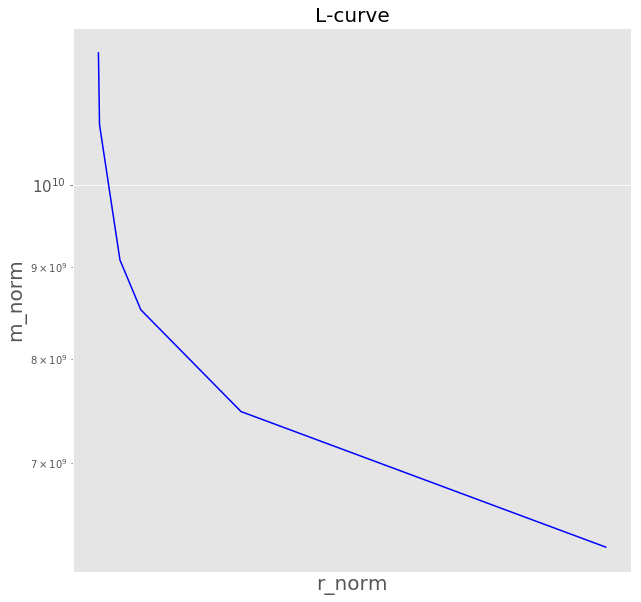

In [28]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

### Results

In [29]:
result_RM_airb['magnetic_moment'] = m_est
result_RM_airb['inc_est'] = incl_est
result_RM_airb['dec_est'] = decl_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_parameter'] = mu_list
result_RM_airb['phi'] = phi_list

### Generating .pickle file

In [30]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [31]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)

### Saved files

In [32]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  data/result_RM_airb.pickle
